# Sentiment analysis with the use of NLTK Python library

# Sentiment analysis
**What is sentiment analysis?**

Sentiment analysis, also known as opinion mining, is a computational technique used to determine the sentiment or emotional tone expressed in a piece of text. It involves automatically analyzing text data to identify and extract subjective information such as opinions, attitudes, and emotions.

The goal of sentiment analysis is to understand the underlying sentiment behind a text, whether it is positive, negative, or neutral. This analysis can be performed on various types of textual data, including social media posts, customer reviews, news articles, and more.

**Methodology in sentiment analysis**

According to the authors of the *Approaches, Tools and Applications for Sentiment Analysis Implementation* article published in the *International Journal of Computer Applications*, there are five essential steps that need to be implemented while peforming a sentiment analysis. Those steps are:
1. **Data collection** - The initial stage of sentiment analysis involves gathering data from user-generated content found in blogs, forums, and social networks. This data is often unstructured and expressed in various forms, including different vocabularies, slangs, and contextual writing styles. Manual analysis of such vast and diverse data becomes nearly impossible. Consequently, text analytics and natural language processing techniques are employed to extract and categorize this data. These methods enable automated extraction of meaningful information and classification of sentiments, overcoming the challenges posed by the disorganized nature of the data and its varying expressions.
2. **Text preparation** - Before conducting the analysis, the extracted data undergoes a cleaning process. This involves identifying and removing non-textual content as well as irrelevant information that is not pertinent to the analysis. By eliminating these elements, the data is refined and prepared for further analysis, focusing only on the essential textual content.
3. **Sentiment detection** - The extracted sentences from reviews and opinions are carefully examined. Sentences that contain subjective expressions such as opinions, beliefs, and views are selected and retained, while sentences that convey objective information such as facts and factual details are discarded. This process ensures that only the subjective content, which is relevant for sentiment analysis, is considered and analyzed further.
4. **Sentiment classification** - During this step, subjective sentences are categorized into positive or negative sentiments, indicating whether they convey a positive or negative evaluation. The classification can also involve determining if the sentiment is "good" or "bad" or if the sentiment reflects "liking" or "disliking" something. It is important to note that the classification can be performed by considering multiple aspects or points, taking into account various factors or dimensions that contribute to the overall sentiment expressed in the sentence.
5. **Presentation of output** - The primary goal of sentiment analysis is to transform unstructured text into valuable and meaningful information. Once the analysis is completed, the textual results are visualized using graphical representations such as pie charts, bar charts, and line graphs. Additionally, the aspect of time can be analyzed, and a sentiment timeline can be constructed, showcasing the chosen value (frequency, percentages, averages) over time in a graphical format. This enables a clear and visual understanding of how sentiments evolve and change over a specific period.


**What is NLTK?**

NLTK is a popular Python library for working with human language data. NLTK includes pre-trained sentiment analysis models that can be used to analyze the sentiment of text. The compound score is a value between -1 and 1, where -1 indicates extremely negative sentiment and 1 indicates extremely positive sentiment. NLTK's sentiment analysis capabilities are useful for various applications, including social media monitoring, customer sentiment analysis, and opinion mining.

**What is BeautifulSoup?**

Beautiful Soup is a popular Python library used for web scraping and parsing HTML and XML documents. It provides convenient methods and functionalities to extract data from web pages by navigating the HTML/XML structure.

# Analysis


**Data**

The sentiment analysis will be performed on the reviews found on https://www.rottentomatoes.com/ regarding the TV show called *Gilmore Girls*. The reviews will refer to the first episode of the first season of the show and will be processed into this essay via the BeautifulSoup Python library.


In [17]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#getting the page content
text = requests.get("https://www.rottentomatoes.com/tv/gilmore-girls/s01/reviews")

soup = BeautifulSoup(text.content, 'html.parser')

# Find the review elements
review_elements = soup.find_all("div", class_="review-text-container")

# Extract the text of the reviews and store them in a list
reviews = [review.find("p", class_="review-text").text.strip() for review in review_elements]

#joining the reviews into a single text string
reviews_text = ' '.join(reviews)

# tokenization
tokens = word_tokenize(reviews_text)

#removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

#lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

#joining the tokens back into a single string
processed_text = ' '.join(lemmatized_tokens)

#sentiment analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(processed_text)

print("Sentiment Analysis Results:")
print(f"Positive Score: {sentiment_scores['pos']}")
print(f"Negative Score: {sentiment_scores['neg']}")
print(f"Neutral Score: {sentiment_scores['neu']}")
print(f"Compound Score: {sentiment_scores['compound']}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sentiment Analysis Results:
Positive Score: 0.302
Negative Score: 0.05
Neutral Score: 0.648
Compound Score: 0.9982


**To illustrate graphically the results of the analysis, the matplotlib Python library provides, among its many different features, a pie chart.**

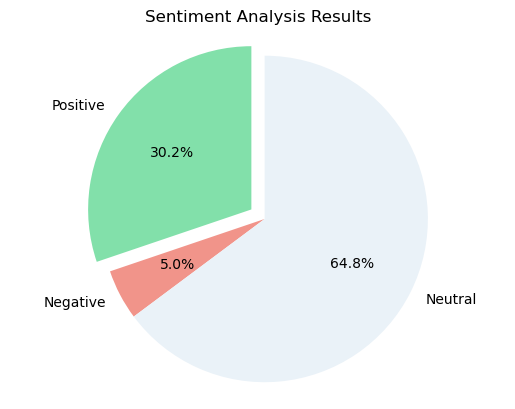

In [18]:
import matplotlib.pyplot as plt

# sentiment analysis scores
positive_score = 0.302
negative_score = 0.05
neutral_score = 0.648

# data for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_score, negative_score, neutral_score]
colors = ['#82E0AA', '#F1948A', '#EAF2F8']
explode = (0.1, 0, 0)  # Explode the 'Positive' slice

# creating the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# adding a title
plt.title('Sentiment Analysis Results')

# displaying the pie chart
plt.show()

# Conclusions

From the analysis results and its graphic illustration it can be infered that the majority of the text in the reviews was marked as neutral, which means that it did not score enough to be classified as either positive or negative. 30.2% is the score which represents the text marked as positive, and only 5% accounts for the negative part of the reviews.

Although the analysis conducted in this essay is consise, it serves as a great example of the capabilities of the linguistic libraries in Python. NLTK's versatility and extensive documentation make it a valuable resource for both beginners and experienced practitioners in the field of natural language processing. Its vast array of functionalities make it a popular choice for researchers, students, and developers working with text and language data.

Overall, NLTK empowers Python developers with a comprehensive set of tools and resources for working with human language data. Whether a person is exploring linguistic patterns, building language models, or conducting sentiment analysis, NLTK is a reliable library that provides a solid foundation for various natural language processing tasks.